
# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Wed, September 14</p>



# Question 1: Applications of machine learning (10 pts)

The article "Of Prediction and Policy", posted on Canvas under Modules --> Additional Resources, mentions several applications of machine learning. Pick any one of the works mentioned in this short article and:

1. (2 pts) Find at least one technical article that describes the work and provide the  citation(s). Very easy to do by Googling the names/institutions.
2. (4pts) In a few sentences describe the methodology/approach that was used.
3. (2 pts) Summarize in a couple of sentences what you liked about this work, and
4. (2 pts) Also summarize in a couple of sentences any concerns you may have about the work or its  application to societal problems.


## Answer



1. Romero, Cristóbal, et al. "Data mining algorithms to classify students." Educational Data Mining 2008. 2008.
2. In this paper they tried out various data mining algorithms to see which ones were the most accurate at predicting "at risk" students within the Moodle online education system by which I mean prediciting students who were liable to fail v Pass and the hope would be to intervene before the student actually failed.
3. I liked the variety of algorithms used to in comparison to predict student outcomes. The paper did a good job at explaining the different types of algorithms and in explaining the trade offs of simplicity and interpretability vs accuracy complexity.
4. I'm concerned about the possible inherent bias resulting from only looking at data from moodle. I think it's possible certain types of students use moodle compared to other online education systems, so these models may not be able to predict those other students as well and I don't see this adressed. 

# Question 2: Maximum likelihood estimate (10 pts)

Consider the following univariate probability distribution 
$$p(x|a,b) = \frac{x^{a-1}}{\Gamma(a)b^a}exp(-\frac{x}{b}),$$ for $x \geq 0$ and $a,b > 0.  ~~ \Gamma(a)$ is a normalization term. 

You are given N i.i.d. data points drawn from this distribution. Derive the MLE estimate for $b$, in terms of $x_1, x_2, \ldots x_N$ and $a$.

## Answer



# Question 3: Conditional Distributions (10 pts)

The joint pdf of two random  variables $X_1$ and $X_2$ is  constant (i.e., the joint distribution is uniform) within the area shown below, and zero outside of it. Given this joint distribution, obtain  the following two univariate distributions from it. It is not necessary to write the equations, if the distributions can be plotted / described in full detail.

a. (6 pts) The marginal distribution of $X_1$, $p_{X_1}(x_1)$

b. (4 pts) The conditional distribution $p_{X_2|X_1}(x_2 \,|\, x_1 = 0.5)$

<img src="hw1p3_questionpic.png">

## Answer



# Question 4: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0.5$

a. (8 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (6 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer



# A 1

Populating the interactive namespace from numpy and matplotlib


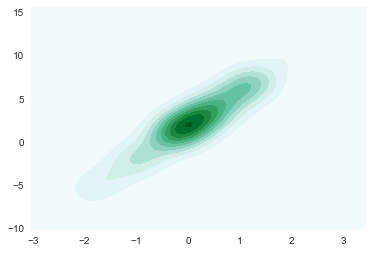

In [12]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
%pylab inline
mean, cov = [0, 2], [(4, 16), (0, 0)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y, shade=True)

# A 2

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


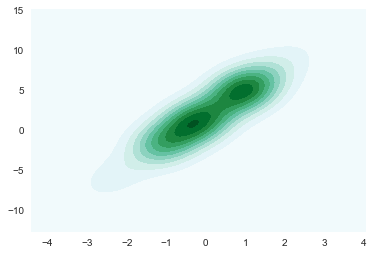

In [10]:
mean, cov = [0, 2], [(4, 16), (4, 4)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y, shade=True)

# B 1

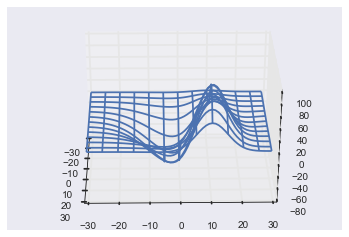

In [16]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

# B 2

# Question 5: MLR using scikit-learn (20 pts)

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer



# 1

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [103]:
Advertising = pd.read_csv("Advertising.csv")

print Advertising.shape
print Advertising.head()

(200, 5)
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# 2

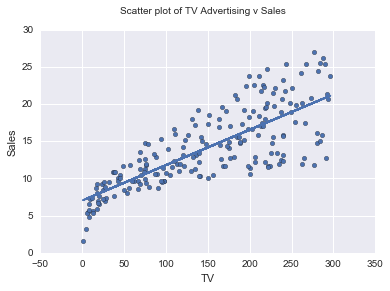

TV adverts and Sales seems to be strongly positively correlated


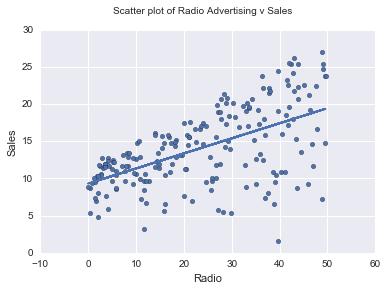

Radio adverts and Sales seem to be relatively strongly positively correlated but less strongly than for TV


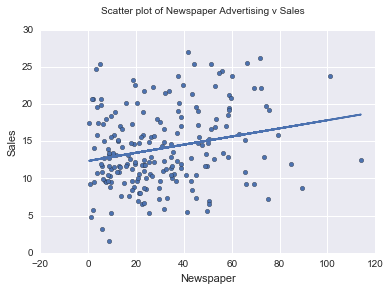

Newspaper adverts seem to not have much of a relationship with sales; perhaps slightly positively but essentially no relationship


In [107]:
#########################################################################
#plot TV v Sales#
#########################################################################
TVSales = plt.scatter(Advertising['TV'], Advertising['Sales'])
plt.suptitle('Scatter plot of TV Advertising v Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(Advertising['TV'], np.poly1d(np.polyfit(Advertising['TV'], Advertising['Sales'], 1))(Advertising['TV']))
plt.show(TVSales)
print "TV adverts and Sales seems to be strongly positively correlated"
#########################################################################
#plot Radio v Sales#
#########################################################################
RadioSales = plt.scatter(Advertising['Radio'], Advertising['Sales'])
plt.suptitle('Scatter plot of Radio Advertising v Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.plot(Advertising['Radio'], np.poly1d(np.polyfit(Advertising['Radio'], Advertising['Sales'], 1))(Advertising['Radio']))
plt.show(RadioSales)
print "Radio adverts and Sales seem to be relatively strongly positively correlated but less strongly than for TV"
#########################################################################
#plot Newspaper v Sales#
#########################################################################
NewspaperSales = plt.scatter(Advertising['Newspaper'], Advertising['Sales'])
plt.suptitle('Scatter plot of Newspaper Advertising v Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.plot(Advertising['Newspaper'], np.poly1d(np.polyfit(Advertising['Newspaper'], Advertising['Sales'], 1))(Advertising['Newspaper']))

plt.show(NewspaperSales)
print "Newspaper adverts seem to not have much of a relationship with sales; perhaps slightly positively but essentially no relationship"

# 3

The estimated coefficient for TV is .0475. This can be interpreted as follows: for every additional thousand dollars spent on TV advertising, Sales of a single product in a given market will go up by 47.5 widgets

In [34]:
result = pd.ols(x=Advertising['TV'], y=Advertising['Sales'])
result

C:\Users\Owner\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         200
Number of Degrees of Freedom:   2

R-squared:         0.6119
Adj R-squared:     0.6099

Rmse:              3.2587

F-stat (1, 198):   312.1450, p-value:     0.0000

Degrees of Freedom: model 1, resid 198

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0475     0.0027      17.67     0.0000     0.0423     0.0528
     intercept     7.0326     0.4578      15.36     0.0000     6.1352     7.9300
---------------------------------End of Summary---------------------------------

# 4

In [134]:
#Split data into training & test Sets
train, test = train_test_split(Advertising, test_size = 0.33)

#######Fit MLR model on training data###############
#Step 1: setup design matrices
y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=train, return_type='dataframe')
#Step 2: Fit regression model
model = sm.OLS(y, X)
results = model.fit()
print results.summary()


ypred = results.predict(X)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     393.0
Date:                Tue, 06 Sep 2016   Prob (F-statistic):           5.56e-65
Time:                        23:30:25   Log-Likelihood:                -255.18
No. Observations:                 134   AIC:                             518.4
Df Residuals:                     130   BIC:                             530.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9256      0.376      7.772      0.0

In [135]:
##first Let's find the in-sample MSE and then we'll find the out of sample MSE and RMSE
ypred = results.predict(X)
MSE_insample = mean_squared_error(y, ypred)
print 'Coefficients:'
print results.params
print "The MSE on the training data is:", MSE_insample

#Out of Sample Prediction
y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=test, return_type='dataframe')
ypred = results.predict(X)
MSE_OOS = mean_squared_error(y, ypred)
RMSE = sqrt(MSE_OOS)
print "The MSE on the test data is:", MSE_OOS
print "The MSE goes up by", MSE_OOS - MSE_insample, "when you go from train to test data"
print "The RMSE is:", RMSE

Coefficients:
Intercept    2.925599
TV           0.045976
Radio        0.193457
Newspaper   -0.004806
dtype: float64
The MSE on the training data is: 2.63999895613
The MSE on the test data is: 3.10219340271
The MSE goes up by 0.462194446584 when you go from train to test data
The RMSE is: 1.76130446054


We see that our residuals look relatively normally distributed. This is good as it validates our assumption of normality of residuals needed for the linear model.

<function matplotlib.pyplot.show>

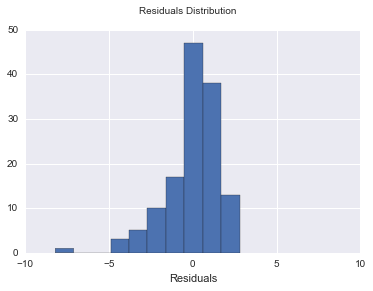

In [133]:
residuals = results.resid

ax = plt.hist(residuals)
plt.xlim(-10,10)
plt.xlabel('Residuals')
plt.suptitle('Residuals Distribution')
plt.show

# Question 6: Illustrating the curse of dimensionality (10 pts)

For a hypersphere of radius $a$ in $d$ dimensions, the volume is related to the surface area of a unit hypersphere (S) as
    $$ V = \frac{S \times a^d}{d}.$$


1. (6 pts) Use this result to show that the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$, where $0 < \epsilon < a$, is given by
$f = 1 - (1 - \epsilon/a)^d$. Hence, show that for any fixed $\epsilon$, no matter how small, this fraction tends to 1 as $d \rightarrow \infty$.
2. (4 pts) Evaluate the ratio $f$ numerically, with $\epsilon/a = 0.01$, for the cases $d$ = 2, 10, and 1000.


This problem shows that if data are randomly distributed within a very high-dimensional hypersphere, most of the mass is near the surface and there is very little of it near the "core". Thus, there are few "representative" points.

## Answer

